



\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
#     PART B Section III       # 
\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
  

In [0]:
# Importation of libraries (incuding tensorflow and keras)
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import h5py

import numpy as np
import matplotlib.pyplot as plt

# read data
from google.colab import drive
drive.mount('/content/gdrive')
!unzip "/content/gdrive/My Drive/Colab Notebooks/data.zip"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  /content/gdrive/My Drive/Colab Notebooks/data.zip
replace data.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
# loadData is a function which load the dataset and split into training/test images and labels
def loadData():
  with h5py.File('data.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    allTrain = hf.get('trainData')
    allTest = hf.get('testData')
    npTrain = np.array(allTrain)
    npTest = np.array(allTest)
    print('Shape of the array dataset_1: \n', npTrain.shape)
    print('Shape of the array dataset_2: \n', npTest.shape)
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]



In [0]:
# Load the data
x_train, y_train, x_test, y_test = loadData()


List of arrays in this file: 
 KeysView(<HDF5 file "data.h5" (mode r)>)
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)


In [0]:
# Build the keras neronal network model:
# Here, there are 2 layers:
#   1st layer of 400 fully-connected neurons with a relu activation 
#   2nd layer of 200 fully-connected neurons with a relu activation 
#   3rd layer of 10 fully-connected neurons with a softmax activation 
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(200, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# the model is configured for training with the those parameters:
#   For the optimizer: Adam Optimization algorithm
#   For the loss: the sparse categorical cross entropy
#   The metric to be evaluated by the model: accuracy 
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# the model is trained with the those parameters:
#   epoch: 6 iterations
#   batch_size: the size of the mini batch which contains 256 elements
#   validation_split: 10% of data used as a validation data
history_2 = model_2.fit(x_train, y_train, epochs=6, batch_size=256, validation_split=0.1)

# the model is evaluated and returns test loss and accuracy
results = model_2.evaluate(x_test, y_test)

# Print the model result on the test data
print("Final Test Loss (model 2): {:.2f}".format(results[0]))
print("Final Test Accuracy (model 2): {:.2f}".format(results[1]))

Instructions for updating:
Colocations handled automatically by placer.
Train on 180000 samples, validate on 20000 samples
Epoch 1/6
180000/180000 [==============================] - 12s 68us/sample - loss: 0.4755 - acc: 0.8586 - val_loss: 0.3955 - val_acc: 0.8809
Epoch 2/6
180000/180000 [==============================] - 12s 68us/sample - loss: 0.3523 - acc: 0.8925 - val_loss: 0.3582 - val_acc: 0.8918
Epoch 3/6
180000/180000 [==============================] - 12s 67us/sample - loss: 0.3056 - acc: 0.9060 - val_loss: 0.3517 - val_acc: 0.8932
Epoch 4/6
180000/180000 [==============================] - 12s 66us/sample - loss: 0.2724 - acc: 0.9160 - val_loss: 0.3449 - val_acc: 0.8968
Epoch 5/6
180000/180000 [==============================] - 12s 68us/sample - loss: 0.2471 - acc: 0.9230 - val_loss: 0.3406 - val_acc: 0.9024
Epoch 6/6
17000/17000 [==============================] - 1s 54us/sample - loss: 0.2705 - acc: 0.9219
Final Test Loss (model 2): 0.27
Final Test Accuracy (model 2): 0.92


In [0]:
# Build the keras neronal network model:
# Here, there are 2 layers:
#   1st layer of 600 fully-connected neurons with a relu activation 
#   2nd layer of 400 fully-connected neurons with a relu activation 
#   3rd layer of 200 fully-connected neurons with a relu activation 
#   4th layer of 10 fully-connected neurons with a softmax activation 
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(600, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(400, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(200, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# the model is configured for training with the those parameters:
#   For the optimizer: Adam Optimization algorithm
#   For the loss: the sparse categorical cross entropy
#   The metric to be evaluated by the model: accuracy 
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# the model is trained with the those parameters:
#   epoch: 6 iterations
#   batch_size: the size of the mini batch which contains 256 elements
#   validation_split: 10% of data used as a validation data
history_3 = model_3.fit(x_train, y_train, epochs=6, batch_size=256, validation_split=0.1)

# the model is evaluated and returns test loss and accuracy
results = model_3.evaluate(x_test, y_test)

# Print the model result on the test data
print("Final Test Loss (model 3): {:.2f}".format(results[0]))
print("Final Test Accuracy (model 3): {:.2f}".format(results[1]))

Train on 180000 samples, validate on 20000 samples
Epoch 1/6
180000/180000 [==============================] - 22s 124us/sample - loss: 0.4581 - acc: 0.8609 - val_loss: 0.3754 - val_acc: 0.8859
Epoch 2/6
180000/180000 [==============================] - 22s 123us/sample - loss: 0.3377 - acc: 0.8954 - val_loss: 0.3504 - val_acc: 0.8925
Epoch 3/6
180000/180000 [==============================] - 22s 124us/sample - loss: 0.2913 - acc: 0.9085 - val_loss: 0.3363 - val_acc: 0.8977
Epoch 4/6
180000/180000 [==============================] - 22s 123us/sample - loss: 0.2565 - acc: 0.9182 - val_loss: 0.3279 - val_acc: 0.9024
Epoch 5/6
180000/180000 [==============================] - 22s 123us/sample - loss: 0.2301 - acc: 0.9265 - val_loss: 0.3341 - val_acc: 0.9018
Epoch 6/6
17000/17000 [==============================] - 1s 77us/sample - loss: 0.2669 - acc: 0.9221
Final Test Loss (model 3): 0.27
Final Test Accuracy (model 3): 0.92


In [0]:
# Build the keras neronal network model:
# Here, there are 2 layers:
#   1st layer of 400 fully-connected neurons with a relu activation 
#   A Drop Out function is implemented with a percentage of 20% 
#   2nd layer of 200 fully-connected neurons with a relu activation 
#   3rd layer of 10 fully-connected neurons with a softmax activation 
model_2_do = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(200, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# the model is configured for training with the those parameters:
#   For the optimizer: Adam Optimization algorithm
#   For the loss: the sparse categorical cross entropy
#   The metric to be evaluated by the model: accuracy 
model_2_do.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# the model is trained with the those parameters:
#   epoch: 6 iterations
#   batch_size: the size of the mini batch which contains 256 elements
#   validation_split: 10% of data used as a validation data
history_2_do = model_2_do.fit(x_train, y_train, epochs=6, batch_size=256, validation_split=0.1)

# the model is evaluated and returns test loss and accuracy
results = model_2_do.evaluate(x_test, y_test)

# Print the model result on the test data
print("Final Test Loss (model 2 DO): {:.2f}".format(results[0]))
print("Final Test Accuracy (model 2 Do): {:.2f}".format(results[1]))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 180000 samples, validate on 20000 samples
Epoch 1/6
180000/180000 [==============================] - 13s 73us/sample - loss: 0.5037 - acc: 0.8494 - val_loss: 0.4030 - val_acc: 0.8795
Epoch 2/6
180000/180000 [==============================] - 13s 72us/sample - loss: 0.3873 - acc: 0.8816 - val_loss: 0.3656 - val_acc: 0.8892
Epoch 3/6
180000/180000 [==============================] - 13s 71us/sample - loss: 0.3473 - acc: 0.8936 - val_loss: 0.3451 - val_acc: 0.8939
Epoch 4/6
180000/180000 [==============================] - 13s 71us/sample - loss: 0.3212 - acc: 0.9008 - val_loss: 0.3309 - val_acc: 0.9003
Epoch 5/6
180000/180000 [==============================] - 13s 71us/sample - loss: 0.2998 - acc: 0.9067 - val_loss: 0.3290 - val_acc: 0.9010
Epoch 6/6
17000/17000 [==============================] - 1s 59us/sample - loss: 0.2559 - acc: 0.9248
Final Test Loss (model 2 DO)

In [0]:
from keras.regularizers import l1
from keras.layers import Activation

# Build the keras neronal network model:
# Here, there are 2 layers:
#   1st layer of 400 fully-connected neurons with a relu activation and l1 regularization of 0.01
#   2nd layer of 200 fully-connected neurons with a relu activation and l1 regularization of 0.01
#   3rd layer of 10 fully-connected neurons with a softmax activation 
model_2_l1r = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400, activation='linear', input_shape=(x_train.shape[1],), activity_regularizer=l1(0.01)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(200, activation='linear', input_shape=(x_train.shape[1],), activity_regularizer=l1(0.01)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# the model is configured for training with the those parameters:
#   For the optimizer: Adam Optimization algorithm
#   For the loss: the sparse categorical cross entropy
#   The metric to be evaluated by the model: accuracy 
model_2_l1r.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# the model is trained with the those parameters:
#   epoch: 6 iterations
#   batch_size: the size of the mini batch which contains 256 elements
#   validation_split: 10% of data used as a validation data
history_2_l1r = model_2_l1r.fit(x_train, y_train, epochs=6, batch_size=256, validation_split=0.1)

# the model is evaluated and returns test loss and accuracy
results = model_2_l1r.evaluate(x_test, y_test)

# Print the model result on the test data
print("Final Test Loss (model 2 l1r): {:.2f}".format(results[0]))
print("Final Test Accuracy (model 2 l1r): {:.2f}".format(results[1]))

Train on 180000 samples, validate on 20000 samples
Epoch 1/6
180000/180000 [==============================] - 26s 145us/sample - loss: 1.4305 - acc: 0.8286 - val_loss: 1.1227 - val_acc: 0.8448
Epoch 2/6
180000/180000 [==============================] - 21s 116us/sample - loss: 1.0044 - acc: 0.8580 - val_loss: 0.9609 - val_acc: 0.8573
Epoch 3/6
180000/180000 [==============================] - 20s 114us/sample - loss: 0.8951 - acc: 0.8672 - val_loss: 0.9058 - val_acc: 0.8570
Epoch 4/6
180000/180000 [==============================] - 24s 135us/sample - loss: 0.8458 - acc: 0.8713 - val_loss: 0.9038 - val_acc: 0.8570
Epoch 5/6
180000/180000 [==============================] - 26s 147us/sample - loss: 0.8119 - acc: 0.8754 - val_loss: 0.8823 - val_acc: 0.8520
Epoch 6/6
17000/17000 [==============================] - 3s 186us/sample - loss: 0.7616 - acc: 0.8855
Final Test Loss (model 2 l1r): 0.76
Final Test Accuracy (model 2 l1r): 0.89


In [0]:
from keras.regularizers import l2

# Build the keras neronal network model:
# Here, there are 2 layers:
#   1st layer of 400 fully-connected neurons with a relu activation and l2 regularization of 0.01
#   2nd layer of 200 fully-connected neurons with a relu activation and l2 regularization of 0.01
#   3rd layer of 10 fully-connected neurons with a softmax activation 
model_2_l2r = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400, activation='linear', input_shape=(x_train.shape[1],), activity_regularizer=l2(0.01)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(200, activation='linear', input_shape=(x_train.shape[1],), activity_regularizer=l2(0.01)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


# the model is configured for training with the those parameters:
#   For the optimizer: Adam Optimization algorithm
#   For the loss: the sparse categorical cross entropy
#   The metric to be evaluated by the model: accuracy 
model_2_l2r.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# the model is trained with the those parameters:
#   epoch: 6 iterations
#   batch_size: the size of the mini batch which contains 256 elements
#   validation_split: 10% of data used as a validation data
history_2_l2r = model_2_l2r.fit(x_train, y_train, epochs=6, batch_size=256, validation_split=0.1)

# the model is evaluated and returns test loss and accuracy
results = model_2_l2r.evaluate(x_test, y_test)

# Print the model result on the test data
print("Final Test Loss (model 2 l2r): {:.2f}".format(results[0]))
print("Final Test Accuracy (model 2 l2r): {:.2f}".format(results[1]))

Train on 180000 samples, validate on 20000 samples
Epoch 1/6
180000/180000 [==============================] - 21s 115us/sample - loss: 0.9409 - acc: 0.8316 - val_loss: 0.7904 - val_acc: 0.8392
Epoch 2/6
180000/180000 [==============================] - 26s 143us/sample - loss: 0.7027 - acc: 0.8621 - val_loss: 0.6852 - val_acc: 0.8618
Epoch 3/6
180000/180000 [==============================] - 26s 143us/sample - loss: 0.6433 - acc: 0.8709 - val_loss: 0.6876 - val_acc: 0.8587
Epoch 4/6
180000/180000 [==============================] - 26s 144us/sample - loss: 0.6116 - acc: 0.8770 - val_loss: 0.6512 - val_acc: 0.8672
Epoch 5/6
180000/180000 [==============================] - 28s 157us/sample - loss: 0.5917 - acc: 0.8818 - val_loss: 0.6402 - val_acc: 0.8654
Epoch 6/6
17000/17000 [==============================] - 1s 59us/sample - loss: 0.5957 - acc: 0.8825
Final Test Loss (model 2 l2r): 0.60
Final Test Accuracy (model 2 l2r): 0.88


In [0]:
# Build the keras neronal network model:
# Here, there are 2 layers:
#   1st layer of 600 fully-connected neurons with a relu activation 
#   A Drop Out function is implemented with a percentage of 20% 
#   2nd layer of 400 fully-connected neurons with a relu activation 
#   A Drop Out function is implemented with a percentage of 20% 
#   3rd layer of 200 fully-connected neurons with a relu activation 
#   4th layer of 10 fully-connected neurons with a softmax activation 
model_3_do = tf.keras.models.Sequential([
    tf.keras.layers.Dense(600, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(400, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(200, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


# the model is configured for training with the those parameters:
#   For the optimizer: Adam Optimization algorithm
#   For the loss: the sparse categorical cross entropy
#   The metric to be evaluated by the model: accuracy 
model_3_do.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# the model is trained with the those parameters:
#   epoch: 6 iterations
#   batch_size: the size of the mini batch which contains 256 elements
#   validation_split: 10% of data used as a validation data
history_3_do = model_3_do.fit(x_train, y_train, epochs=6, batch_size=256, validation_split=0.1)

# the model is evaluated and returns test loss and accuracy
results = model_3_do.evaluate(x_test, y_test)

# Print the model result on the test data
print("Final Test Loss (model 3 do): {:.2f}".format(results[0]))
print("Final Test Accuracy (model 3 do): {:.2f}".format(results[1]))

Train on 180000 samples, validate on 20000 samples
Epoch 1/6
180000/180000 [==============================] - 38s 211us/sample - loss: 0.5011 - acc: 0.8475 - val_loss: 0.3998 - val_acc: 0.8768
Epoch 2/6
180000/180000 [==============================] - 38s 212us/sample - loss: 0.3871 - acc: 0.8796 - val_loss: 0.3588 - val_acc: 0.8906
Epoch 3/6
180000/180000 [==============================] - 36s 199us/sample - loss: 0.3492 - acc: 0.8905 - val_loss: 0.3496 - val_acc: 0.8919
Epoch 4/6
180000/180000 [==============================] - 32s 179us/sample - loss: 0.3239 - acc: 0.8982 - val_loss: 0.3326 - val_acc: 0.8971
Epoch 5/6
180000/180000 [==============================] - 33s 185us/sample - loss: 0.3039 - acc: 0.9039 - val_loss: 0.3206 - val_acc: 0.9024
Epoch 6/6
17000/17000 [==============================] - 1s 83us/sample - loss: 0.2494 - acc: 0.9230
Final Test Loss (model 3 do): 0.25
Final Test Accuracy (model 3 do): 0.92


In [0]:
from keras.regularizers import l1

# Build the keras neronal network model:
# Here, there are 2 layers:
#   1st layer of 600 fully-connected neurons with a relu activation and l1 regularization of 0.01
#   2nd layer of 400 fully-connected neurons with a relu activation and l1 regularization of 0.01
#   3rd layer of 200 fully-connected neurons with a relu activation and l1 regularization of 0.01
#   4th layer of 10 fully-connected neurons with a softmax activation 
model_3_l1r = tf.keras.models.Sequential([
    tf.keras.layers.Dense(600, activation='linear', input_shape=(x_train.shape[1],), activity_regularizer=l1(0.01)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(400, activation='linear', input_shape=(x_train.shape[1],), activity_regularizer=l1(0.01)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(200, activation='linear', input_shape=(x_train.shape[1],), activity_regularizer=l1(0.01)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# the model is configured for training with the those parameters:
#   For the optimizer: Adam Optimization algorithm
#   For the loss: the sparse categorical cross entropy
#   The metric to be evaluated by the model: accuracy 
model_3_l1r.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# the model is trained with the those parameters:
#   epoch: 6 iterations
#   batch_size: the size of the mini batch which contains 256 elements
#   validation_split: 10% of data used as a validation data
history_3_l1r = model_3_l1r.fit(x_train, y_train, epochs=6, batch_size=256, validation_split=0.1)

# the model is evaluated and returns test loss and accuracy
results = model_3_l1r.evaluate(x_test, y_test)

# Print the model result on the test data
print("Final Test Loss (model 3 l1r): {:.2f}".format(results[0]))
print("Final Test Accuracy (model 3 l1r): {:.2f}".format(results[1]))

Train on 180000 samples, validate on 20000 samples
Epoch 1/6
180000/180000 [==============================] - 32s 179us/sample - loss: 1.7556 - acc: 0.8302 - val_loss: 1.4884 - val_acc: 0.8047
Epoch 2/6
180000/180000 [==============================] - 34s 190us/sample - loss: 1.2290 - acc: 0.8597 - val_loss: 1.1869 - val_acc: 0.8565
Epoch 3/6
180000/180000 [==============================] - 30s 165us/sample - loss: 1.0958 - acc: 0.8683 - val_loss: 1.0895 - val_acc: 0.8598
Epoch 4/6
180000/180000 [==============================] - 32s 176us/sample - loss: 1.0207 - acc: 0.8738 - val_loss: 1.0952 - val_acc: 0.8486
Epoch 5/6
180000/180000 [==============================] - 33s 184us/sample - loss: 0.9802 - acc: 0.8769 - val_loss: 1.0565 - val_acc: 0.8590
Epoch 6/6
17000/17000 [==============================] - 2s 89us/sample - loss: 0.9151 - acc: 0.8891
Final Test Loss (model 3 l1r): 0.92
Final Test Accuracy (model 3 l1r): 0.89


In [0]:
from keras.regularizers import l2

# Build the keras neronal network model:
# Here, there are 2 layers:
#   1st layer of 600 fully-connected neurons with a relu activation and l2 regularization of 0.01
#   2nd layer of 400 fully-connected neurons with a relu activation and l2 regularization of 0.01
#   3rd layer of 200 fully-connected neurons with a relu activation and l2 regularization of 0.01
#   4th layer of 10 fully-connected neurons with a softmax activation 
model_3_l2r = tf.keras.models.Sequential([
    tf.keras.layers.Dense(600, activation='linear', input_shape=(x_train.shape[1],), activity_regularizer=l2(0.01)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(400, activation='linear', input_shape=(x_train.shape[1],), activity_regularizer=l2(0.01)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(200, activation='linear', input_shape=(x_train.shape[1],), activity_regularizer=l2(0.01)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# the model is configured for training with the those parameters:
#   For the optimizer: Adam Optimization algorithm
#   For the loss: the sparse categorical cross entropy
#   The metric to be evaluated by the model: accuracy 
model_3_l2r.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# the model is trained with the those parameters:
#   epoch: 6 iterations
#   batch_size: the size of the mini batch which contains 256 elements
#   validation_split: 10% of data used as a validation data
history_3_l2r = model_3_l2r.fit(x_train, y_train, epochs=6, batch_size=256, validation_split=0.1)

# the model is evaluated and returns test loss and accuracy
results = model_3_l2r.evaluate(x_test, y_test)

# Print the model result on the test data
print("Final Test Loss (model 2 l2r): {:.2f}".format(results[0]))
print("Final Test Accuracy (model 2 l2r): {:.2f}".format(results[1]))

Train on 180000 samples, validate on 20000 samples
Epoch 1/6
180000/180000 [==============================] - 35s 192us/sample - loss: 1.0125 - acc: 0.8340 - val_loss: 0.8476 - val_acc: 0.8475
Epoch 2/6
180000/180000 [==============================] - 30s 167us/sample - loss: 0.7828 - acc: 0.8627 - val_loss: 0.8636 - val_acc: 0.8268
Epoch 3/6
180000/180000 [==============================] - 32s 179us/sample - loss: 0.7242 - acc: 0.8738 - val_loss: 0.8076 - val_acc: 0.8483
Epoch 4/6
180000/180000 [==============================] - 29s 159us/sample - loss: 0.7010 - acc: 0.8788 - val_loss: 0.8597 - val_acc: 0.8413
Epoch 5/6
180000/180000 [==============================] - 30s 166us/sample - loss: 0.6769 - acc: 0.8838 - val_loss: 0.7730 - val_acc: 0.8601
Epoch 6/6
17000/17000 [==============================] - 1s 85us/sample - loss: 0.6775 - acc: 0.8865
Final Test Loss (model 2 l2r): 0.68
Final Test Accuracy (model 2 l2r): 0.89


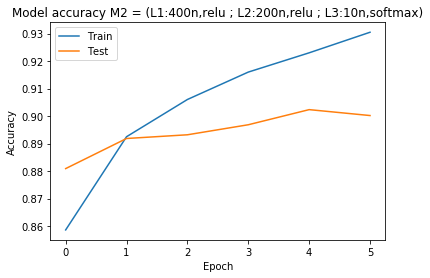

In [0]:
plt.plot(history_2.history['acc']) 
# Plot training & validation accuracy values
plt.plot(history_2.history['val_acc'])
plt.title('Model accuracy M2 = (L1:400n,relu ; L2:200n,relu ; L3:10n,softmax)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

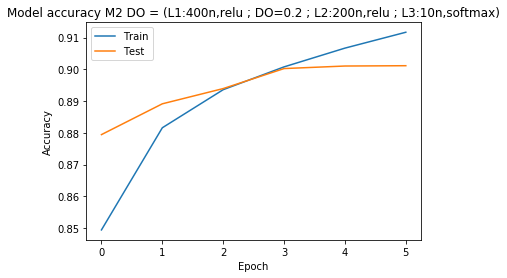

In [0]:
plt.plot(history_2_do.history['acc']) 
# Plot training & validation accuracy values
plt.plot(history_2_do.history['val_acc'])
plt.title('Model accuracy M2 DO = (L1:400n,relu ; DO=0.2 ; L2:200n,relu ; L3:10n,softmax)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

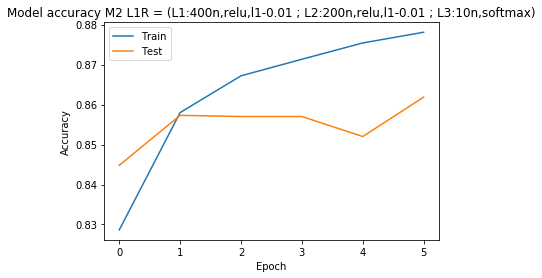

In [0]:
plt.plot(history_2_l1r.history['acc']) 
# Plot training & validation accuracy values
plt.plot(history_2_l1r.history['val_acc'])
plt.title('Model accuracy M2 L1R = (L1:400n,relu,l1-0.01 ; L2:200n,relu,l1-0.01 ; L3:10n,softmax)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

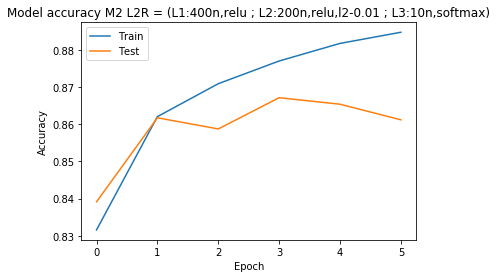

In [0]:
plt.plot(history_2_l2r.history['acc']) 
# Plot training & validation accuracy values
plt.plot(history_2_l2r.history['val_acc'])
plt.title('Model accuracy M2 L2R = (L1:400n,relu ; L2:200n,relu,l2-0.01 ; L3:10n,softmax)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

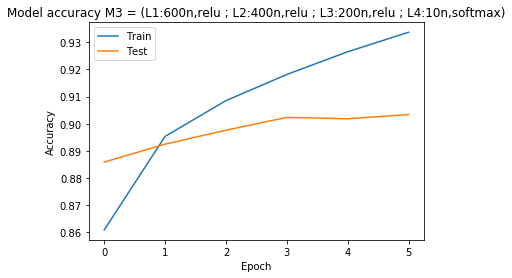

In [0]:
plt.plot(history_3.history['acc']) 
# Plot training & validation accuracy values
plt.plot(history_3.history['val_acc'])
plt.title('Model accuracy M3 = (L1:600n,relu ; L2:400n,relu ; L3:200n,relu ; L4:10n,softmax)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

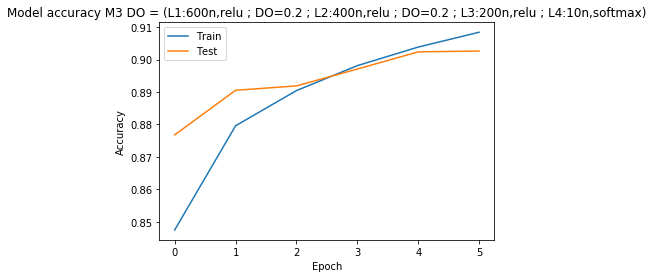

In [0]:
plt.plot(history_3_do.history['acc']) 
# Plot training & validation accuracy values
plt.plot(history_3_do.history['val_acc'])
plt.title('Model accuracy M3 DO = (L1:600n,relu ; DO=0.2 ; L2:400n,relu ; DO=0.2 ; L3:200n,relu ; L4:10n,softmax)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

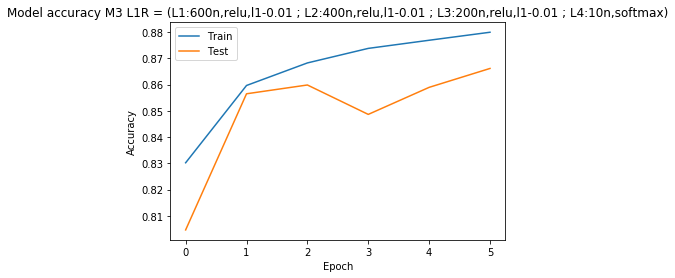

In [0]:
plt.plot(history_3_l1r.history['acc']) 
# Plot training & validation accuracy values
plt.plot(history_3_l1r.history['val_acc'])
plt.title('Model accuracy M3 L1R = (L1:600n,relu,l1-0.01 ; L2:400n,relu,l1-0.01 ; L3:200n,relu,l1-0.01 ; L4:10n,softmax)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

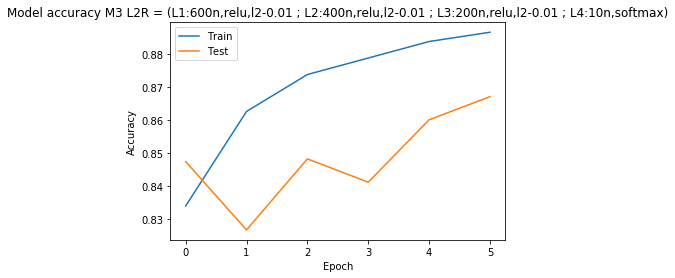

In [0]:
plt.plot(history_3_l2r.history['acc']) 
# Plot training & validation accuracy values
plt.plot(history_3_l2r.history['val_acc'])
plt.title('Model accuracy M3 L2R = (L1:600n,relu,l2-0.01 ; L2:400n,relu,l2-0.01 ; L3:200n,relu,l2-0.01 ; L4:10n,softmax)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

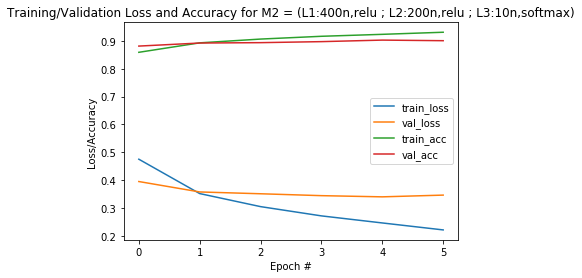

In [0]:
plt.figure()
plt.plot(np.arange(0, 6), history_2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 6), history_2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 6), history_2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 6), history_2.history["val_acc"], label="val_acc")
plt.title("Training/Validation Loss and Accuracy for M2 = (L1:400n,relu ; L2:200n,relu ; L3:10n,softmax)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

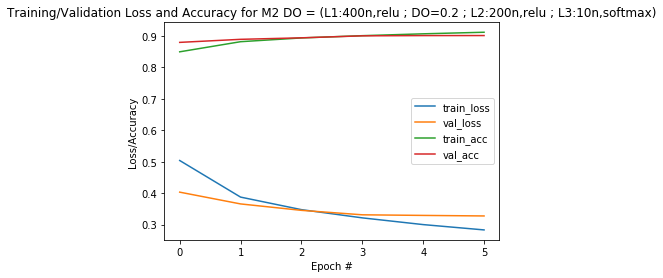

In [0]:
plt.figure()
plt.plot(np.arange(0, 6), history_2_do.history["loss"], label="train_loss")
plt.plot(np.arange(0, 6), history_2_do.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 6), history_2_do.history["acc"], label="train_acc")
plt.plot(np.arange(0, 6), history_2_do.history["val_acc"], label="val_acc")
plt.title('Training/Validation Loss and Accuracy for M2 DO = (L1:400n,relu ; DO=0.2 ; L2:200n,relu ; L3:10n,softmax)')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

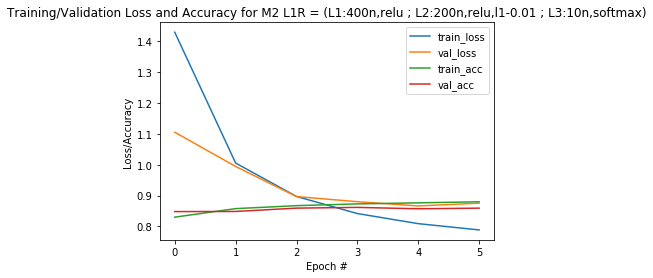

In [0]:
plt.figure()
plt.plot(np.arange(0, 6), history_2_l1r.history["loss"], label="train_loss")
plt.plot(np.arange(0, 6), history_2_l1r.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 6), history_2_l1r.history["acc"], label="train_acc")
plt.plot(np.arange(0, 6), history_2_l1r.history["val_acc"], label="val_acc")
plt.title('Training/Validation Loss and Accuracy for M2 L1R = (L1:400n,relu ; L2:200n,relu,l1-0.01 ; L3:10n,softmax)')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

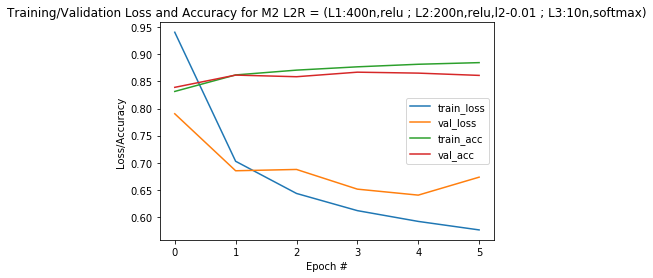

In [0]:
plt.figure()
plt.plot(np.arange(0, 6), history_2_l2r.history["loss"], label="train_loss")
plt.plot(np.arange(0, 6), history_2_l2r.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 6), history_2_l2r.history["acc"], label="train_acc")
plt.plot(np.arange(0, 6), history_2_l2r.history["val_acc"], label="val_acc")
plt.title('Training/Validation Loss and Accuracy for M2 L2R = (L1:400n,relu ; L2:200n,relu,l2-0.01 ; L3:10n,softmax)')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

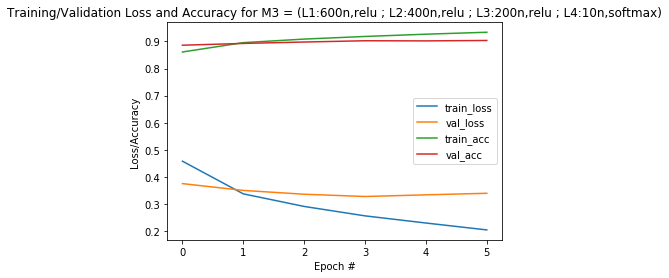

In [0]:
plt.figure()
plt.plot(np.arange(0, 6), history_3.history["loss"], label="train_loss")
plt.plot(np.arange(0, 6), history_3.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 6), history_3.history["acc"], label="train_acc")
plt.plot(np.arange(0, 6), history_3.history["val_acc"], label="val_acc")
plt.title("Training/Validation Loss and Accuracy for M3 = (L1:600n,relu ; L2:400n,relu ; L3:200n,relu ; L4:10n,softmax)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

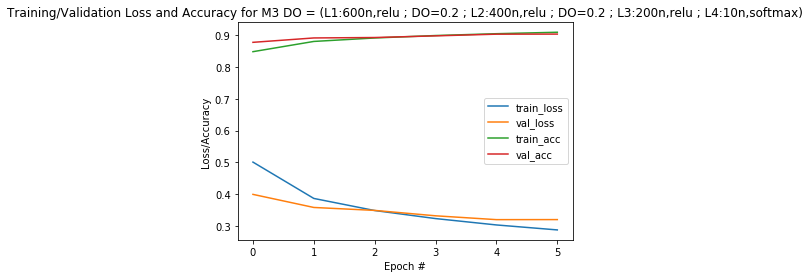

In [0]:
plt.figure()
plt.plot(np.arange(0, 6), history_3_do.history["loss"], label="train_loss")
plt.plot(np.arange(0, 6), history_3_do.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 6), history_3_do.history["acc"], label="train_acc")
plt.plot(np.arange(0, 6), history_3_do.history["val_acc"], label="val_acc")
plt.title('Training/Validation Loss and Accuracy for M3 DO = (L1:600n,relu ; DO=0.2 ; L2:400n,relu ; DO=0.2 ; L3:200n,relu ; L4:10n,softmax)')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

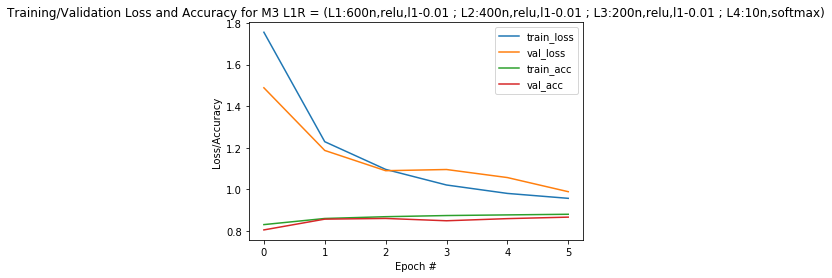

In [0]:
plt.figure()
plt.plot(np.arange(0, 6), history_3_l1r.history["loss"], label="train_loss")
plt.plot(np.arange(0, 6), history_3_l1r.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 6), history_3_l1r.history["acc"], label="train_acc")
plt.plot(np.arange(0, 6), history_3_l1r.history["val_acc"], label="val_acc")
plt.title('Training/Validation Loss and Accuracy for M3 L1R = (L1:600n,relu,l1-0.01 ; L2:400n,relu,l1-0.01 ; L3:200n,relu,l1-0.01 ; L4:10n,softmax)')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

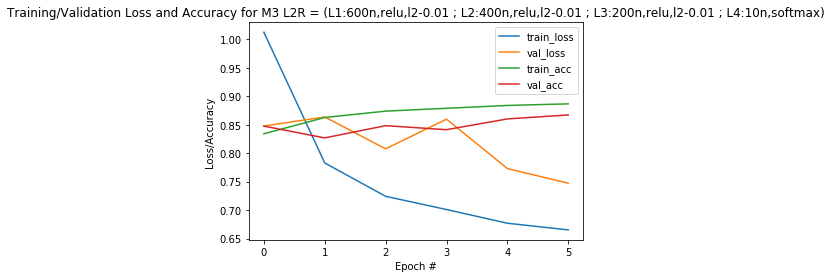

In [0]:
plt.figure()
plt.plot(np.arange(0, 6), history_3_l2r.history["loss"], label="train_loss")
plt.plot(np.arange(0, 6), history_3_l2r.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 6), history_3_l2r.history["acc"], label="train_acc")
plt.plot(np.arange(0, 6), history_3_l2r.history["val_acc"], label="val_acc")
plt.title('Training/Validation Loss and Accuracy for M3 L2R = (L1:600n,relu,l2-0.01 ; L2:400n,relu,l2-0.01 ; L3:200n,relu,l2-0.01 ; L4:10n,softmax)')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

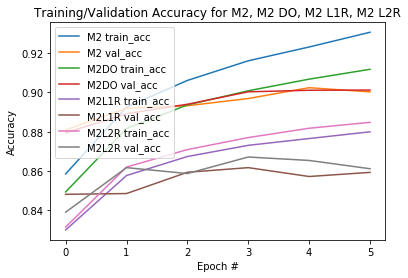

In [0]:
plt.figure()
plt.plot(np.arange(0, 6), history_2.history["acc"], label="M2 train_acc")
plt.plot(np.arange(0, 6), history_2.history["val_acc"], label="M2 val_acc")
plt.plot(np.arange(0, 6), history_2_do.history["acc"], label="M2DO train_acc")
plt.plot(np.arange(0, 6), history_2_do.history["val_acc"], label="M2DO val_acc")
plt.plot(np.arange(0, 6), history_2_l1r.history["acc"], label="M2L1R train_acc")
plt.plot(np.arange(0, 6), history_2_l1r.history["val_acc"], label="M2L1R val_acc")
plt.plot(np.arange(0, 6), history_2_l2r.history["acc"], label="M2L2R train_acc")
plt.plot(np.arange(0, 6), history_2_l2r.history["val_acc"], label="M2L2R val_acc")
plt.title("Training/Validation Accuracy for M2, M2 DO, M2 L1R, M2 L2R")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()

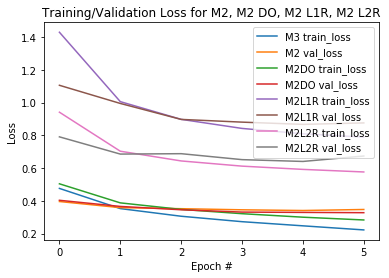

In [0]:
plt.figure()
plt.plot(np.arange(0, 6), history_2.history["loss"], label="M3 train_loss")
plt.plot(np.arange(0, 6), history_2.history["val_loss"], label="M2 val_loss")
plt.plot(np.arange(0, 6), history_2_do.history["loss"], label="M2DO train_loss")
plt.plot(np.arange(0, 6), history_2_do.history["val_loss"], label="M2DO val_loss")
plt.plot(np.arange(0, 6), history_2_l1r.history["loss"], label="M2L1R train_loss")
plt.plot(np.arange(0, 6), history_2_l1r.history["val_loss"], label="M2L1R val_loss")
plt.plot(np.arange(0, 6), history_2_l2r.history["loss"], label="M2L2R train_loss")
plt.plot(np.arange(0, 6), history_2_l2r.history["val_loss"], label="M2L2R val_loss")
plt.title("Training/Validation Loss for M2, M2 DO, M2 L1R, M2 L2R")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

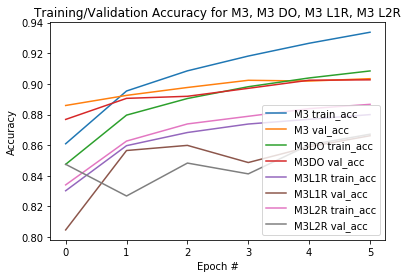

In [0]:
plt.figure()
plt.plot(np.arange(0, 6), history_3.history["acc"], label="M3 train_acc")
plt.plot(np.arange(0, 6), history_3.history["val_acc"], label="M3 val_acc")
plt.plot(np.arange(0, 6), history_3_do.history["acc"], label="M3DO train_acc")
plt.plot(np.arange(0, 6), history_3_do.history["val_acc"], label="M3DO val_acc")
plt.plot(np.arange(0, 6), history_3_l1r.history["acc"], label="M3L1R train_acc")
plt.plot(np.arange(0, 6), history_3_l1r.history["val_acc"], label="M3L1R val_acc")
plt.plot(np.arange(0, 6), history_3_l2r.history["acc"], label="M3L2R train_acc")
plt.plot(np.arange(0, 6), history_3_l2r.history["val_acc"], label="M3L2R val_acc")
plt.title("Training/Validation Accuracy for M3, M3 DO, M3 L1R, M3 L2R")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()

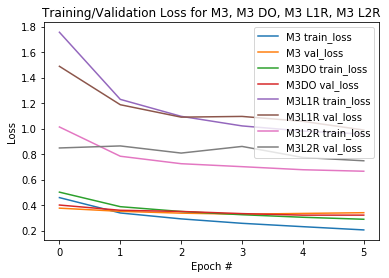

In [0]:
plt.figure()
plt.plot(np.arange(0, 6), history_3.history["loss"], label="M3 train_loss")
plt.plot(np.arange(0, 6), history_3.history["val_loss"], label="M3 val_loss")
plt.plot(np.arange(0, 6), history_3_do.history["loss"], label="M3DO train_loss")
plt.plot(np.arange(0, 6), history_3_do.history["val_loss"], label="M3DO val_loss")
plt.plot(np.arange(0, 6), history_3_l1r.history["loss"], label="M3L1R train_loss")
plt.plot(np.arange(0, 6), history_3_l1r.history["val_loss"], label="M3L1R val_loss")
plt.plot(np.arange(0, 6), history_3_l2r.history["loss"], label="M3L2R train_loss")
plt.plot(np.arange(0, 6), history_3_l2r.history["val_loss"], label="M3L2R val_loss")
plt.title("Training/Validation Loss for M3, M3 DO, M3 L1R, M3 L2R")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()